In [1]:
import numpy as np
import time
import csv
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
import pandas as pd 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import scipy.stats
from scipy import stats
from scipy.stats import ksone
import statistics
from scipy.stats import f
from IPython.display import display, Math
import numpy as np
from scipy.stats import chi2
from scipy.stats import t

##  Шаг 1

Для того, чтобы запарсить меню Бургер Кинга - я воспользуюсь сервисом по доставке еды - Яндекс Еда

In [2]:
with open('burger_data.csv', 'w') as new_file:
                # csv
                fieldnames = ['Title', 'Price', 'Категория']

                csv_writer = csv.DictWriter(new_file, fieldnames=fieldnames, delimiter=',')

                csv_writer.writeheader()


                # prepare for parsing
                chrome_options = Options()
                chrome_options.add_argument("--headless")
                driver = webdriver.Chrome(ChromeDriverManager().install(), options=chrome_options)
                website = 'https://eda.yandex/restaurant/burger_king49'
                driver.implicitly_wait(3)
                driver.get(website)
                # some variables for parsing
                root = driver.find_elements_by_css_selector("div[class='RestaurantPageMenuItem_root']")
                titles = driver.find_elements_by_css_selector("h3[class='RestaurantPageMenuItem_title']")
                prices = driver.find_elements_by_css_selector("span[class='RestaurantPageMenuItem_price']")
                category = driver.find_elements_by_css_selector("div[class='RestaurantPageMenuCategory_titleWrapper']")
                category_list = []
                for j in category:
                    for i in range(int(j.find_element_by_css_selector("span[class='RestaurantPageMenuCategory_count']").text)):
                        category_list.append(j.find_element_by_css_selector("h2[class='RestaurantPageMenuCategory_title']").text)
        
                for i in range(0, len(root) - 1):
                    new_file.write(str(root[i].find_element_by_css_selector("h3[class='RestaurantPageMenuItem_title']").text).replace(',', '') + ',' +
                         root[i].find_element_by_css_selector("span[class='RestaurantPageMenuItem_price']").text + ',' + category_list[i])
                    new_file.write('\n')
                print('data saved')

[WDM] - Cache is valid for [04/06/2020]
[WDM] - Looking for [chromedriver 83.0.4103.39 mac64] driver in cache 
[WDM] - Driver found in cache [/Users/rustem/.wdm/drivers/chromedriver/83.0.4103.39/mac64/chromedriver]


 
data saved


Проверяем таблицу

In [3]:
data = pd.read_csv("burger_data.csv") 
data.head()

,Title,Price,Категория
0,Сырная Мэри,219 ₽,Популярные блюда
1,Чикен Кинг,149 ₽,Популярные блюда
2,Воппер с сыром,249 ₽,Популярные блюда
3,"Кинг Букет ""Крылышки XXL""",599 ₽,Популярные блюда
4,Горячий брауни,149 ₽,Популярные блюда


## Шаг 2

Шаг 2 в моем случае будет не сильно масштабным, так как еще на этапе парсинга я почистил элементы, например сделал replace запятых, чтобы таблица не съезжала

Однако, знак рубля не позволит сделать различные рассчеты, поэтому поработаю с ним

In [4]:
data['Price'] = data['Price'].str.replace("₽", "")
data['Price'] = data['Price'].astype('int32')
data.head()

,Title,Price,Категория
0,Сырная Мэри,219,Популярные блюда
1,Чикен Кинг,149,Популярные блюда
2,Воппер с сыром,249,Популярные блюда
3,"Кинг Букет ""Крылышки XXL""",599,Популярные блюда
4,Горячий брауни,149,Популярные блюда


In [5]:
data.dtypes

Title        object
Price         int32
Категория    object
dtype: object

### Шаг 3

Имеет смысл понять, соотвествует ли блюдо среднему счету в сетях фастфуда в Москве - https://business-planner.ru/articles/analitika/issledovanie-rynka-fastfuda-v-moskve-v-2017-godu.html
Около 270 рублей

In [6]:
data['More than average'] = data['Price'] > 270
data

,Title,Price,Категория,More than average
0,Сырная Мэри,219,Популярные блюда,False
1,Чикен Кинг,149,Популярные блюда,False
2,Воппер с сыром,249,Популярные блюда,False
3,"Кинг Букет ""Крылышки XXL""",599,Популярные блюда,True
4,Горячий брауни,149,Популярные блюда,False
...,...,...,...,...
146,Пирожок с вишней,59,Десерты,False
147,ИГРУШКА,169,Десерты,False
148,ИГРУШКА,169,Десерты,False
149,Жевательная резинка Орбит сладкая мята,39,Джуниор Меню,False


In [7]:
data.head()

,Title,Price,Категория,More than average
0,Сырная Мэри,219,Популярные блюда,False
1,Чикен Кинг,149,Популярные блюда,False
2,Воппер с сыром,249,Популярные блюда,False
3,"Кинг Букет ""Крылышки XXL""",599,Популярные блюда,True
4,Горячий брауни,149,Популярные блюда,False


In [8]:
data

,Title,Price,Категория,More than average
0,Сырная Мэри,219,Популярные блюда,False
1,Чикен Кинг,149,Популярные блюда,False
2,Воппер с сыром,249,Популярные блюда,False
3,"Кинг Букет ""Крылышки XXL""",599,Популярные блюда,True
4,Горячий брауни,149,Популярные блюда,False
...,...,...,...,...
146,Пирожок с вишней,59,Десерты,False
147,ИГРУШКА,169,Десерты,False
148,ИГРУШКА,169,Десерты,False
149,Жевательная резинка Орбит сладкая мята,39,Джуниор Меню,False


В сетях фастфудах большое внимание уделяют дешевым продуктом до 50 рублей, вроде чизбургера в Макдоналдсе. Посмотрим такие продукты в нашпей дате

In [9]:
data['Less than 50?'] = data['Price'] < 50
data

,Title,Price,Категория,More than average,Less than 50?
0,Сырная Мэри,219,Популярные блюда,False,False
1,Чикен Кинг,149,Популярные блюда,False,False
2,Воппер с сыром,249,Популярные блюда,False,False
3,"Кинг Букет ""Крылышки XXL""",599,Популярные блюда,True,False
4,Горячий брауни,149,Популярные блюда,False,False
...,...,...,...,...,...
146,Пирожок с вишней,59,Десерты,False,False
147,ИГРУШКА,169,Десерты,False,False
148,ИГРУШКА,169,Десерты,False,False
149,Жевательная резинка Орбит сладкая мята,39,Джуниор Меню,False,True


Посмотрим относится ли блюдо к числу популярных

In [10]:
data['Popular dish'] = (data['Категория'] == 'Популярные блюда')

In [11]:
data

,Title,Price,Категория,More than average,Less than 50?,Popular dish
0,Сырная Мэри,219,Популярные блюда,False,False,True
1,Чикен Кинг,149,Популярные блюда,False,False,True
2,Воппер с сыром,249,Популярные блюда,False,False,True
3,"Кинг Букет ""Крылышки XXL""",599,Популярные блюда,True,False,True
4,Горячий брауни,149,Популярные блюда,False,False,True
...,...,...,...,...,...,...
146,Пирожок с вишней,59,Десерты,False,False,False
147,ИГРУШКА,169,Десерты,False,False,False
148,ИГРУШКА,169,Десерты,False,False,False
149,Жевательная резинка Орбит сладкая мята,39,Джуниор Меню,False,True,False


## Шаг 4

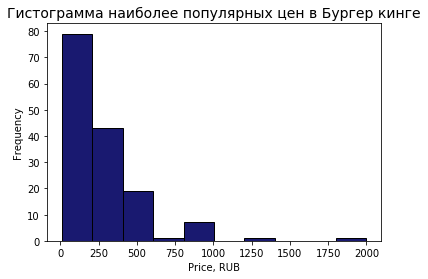

In [12]:
plt.hist(data['Price'], rwidth=1, histtype='bar', color='midnightblue', alpha=1, edgecolor='black');
plt.xlabel('Price, RUB', fontsize=10);
plt.ylabel('Frequency', fontsize=10);
plt.title('Гистограмма наиболее популярных цен в Бургер кинге', fontsize=14);

Внешне распределение напоминает хи-квадрат

Посмотрим на корелляцию различных компонентов друг с другом

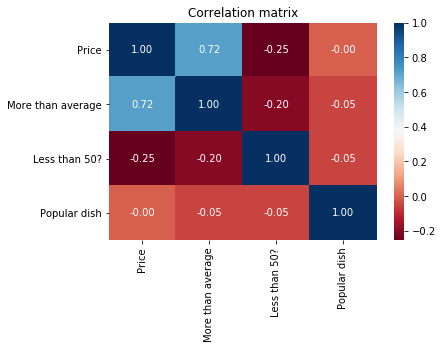

In [13]:
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='RdBu').set_title('Сorrelation matrix');

Интересен тот факт, что взаимосвязи между популярными блюдом и дешевым блюдом старетром(меньше 50 рублей) нет. Я думал наиболее популярные  блюда это и есть наиболее дешевые :)

Посмотрим какая категория является наиболее популярной

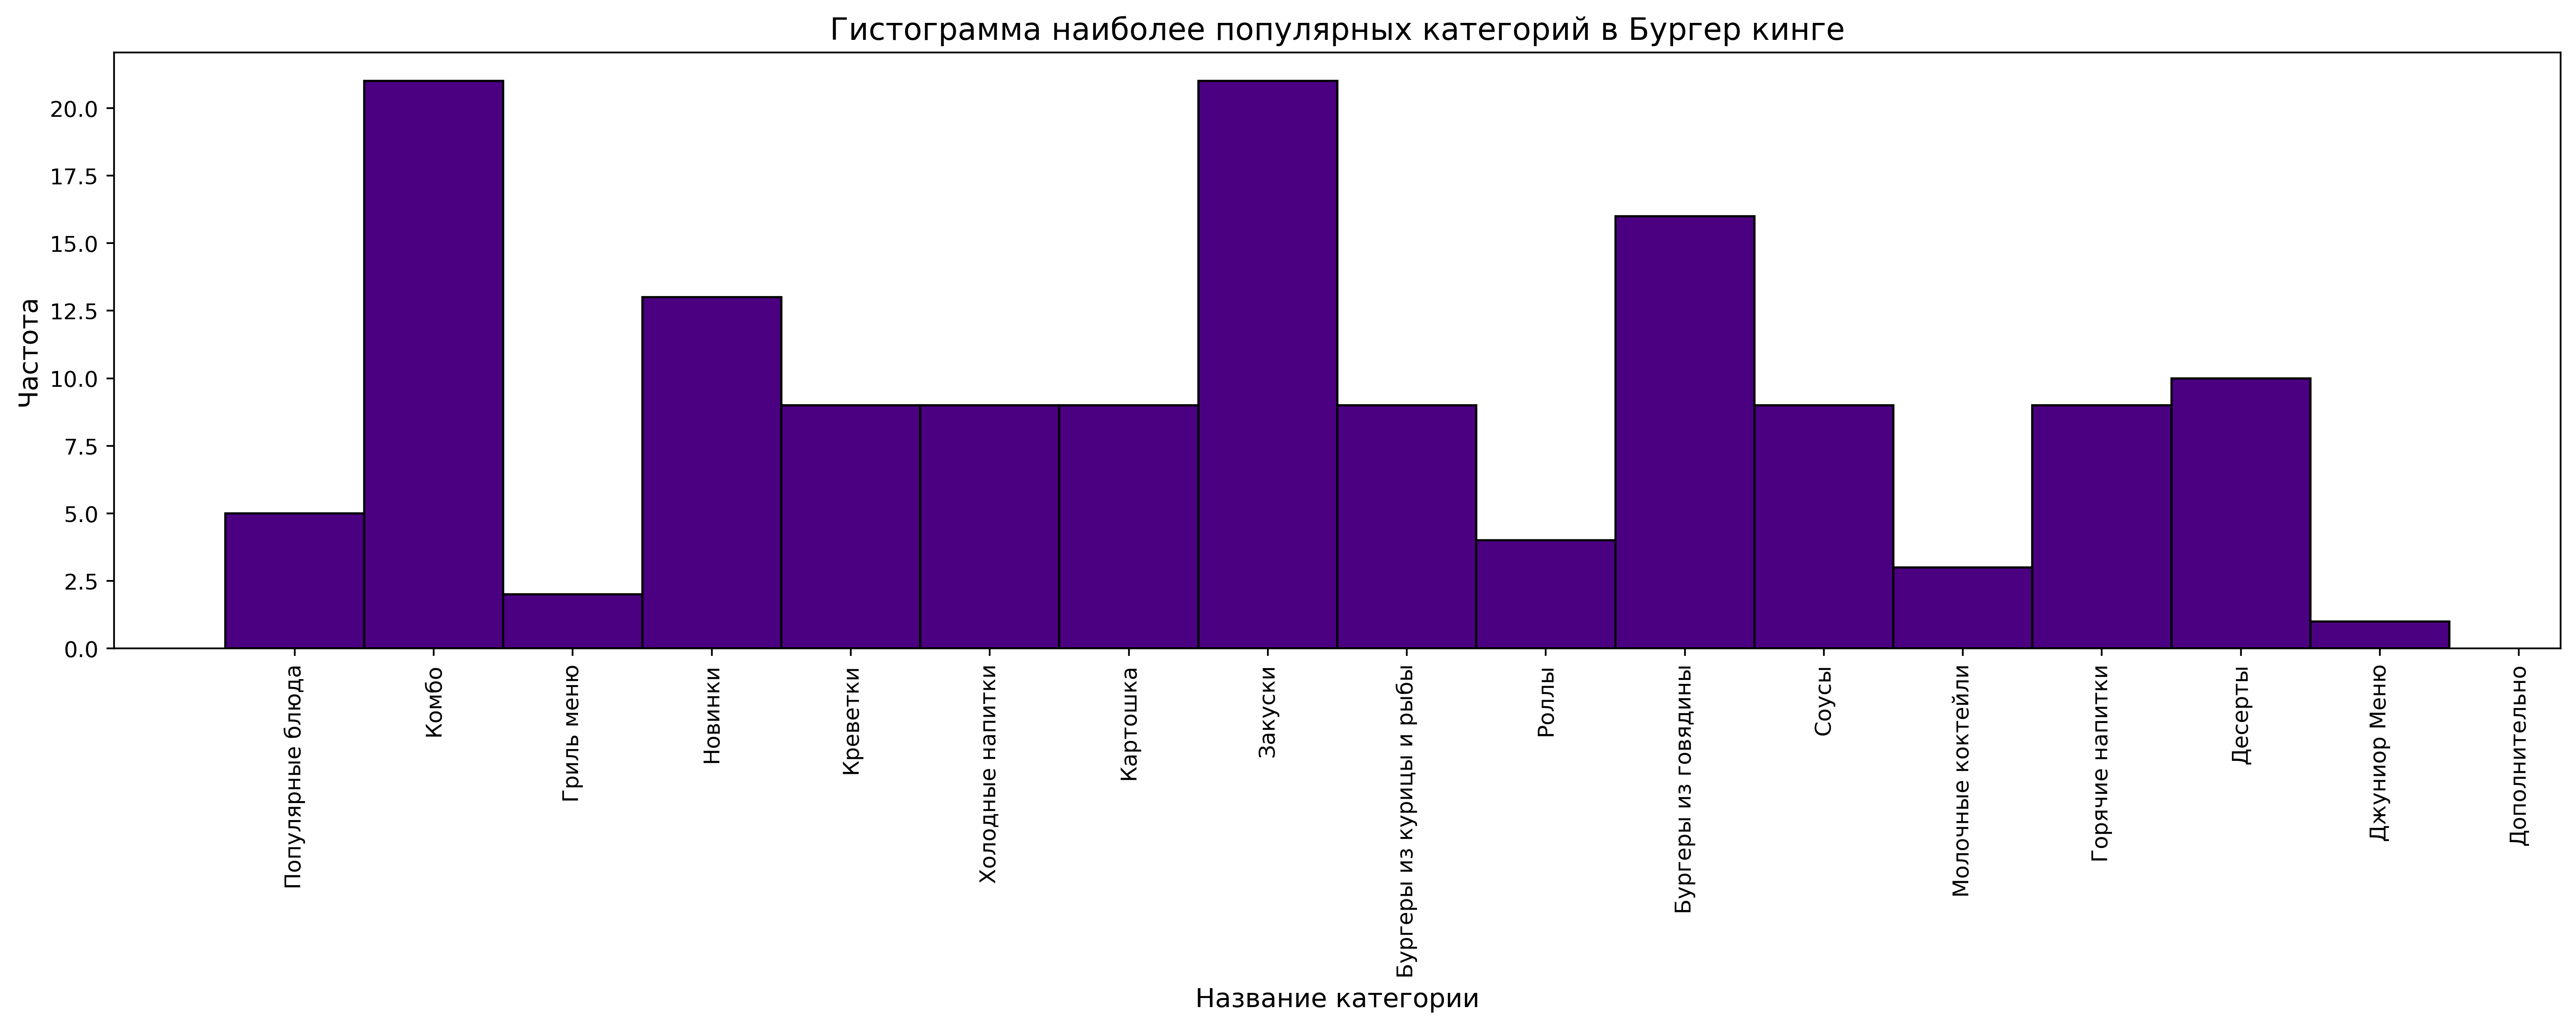

In [14]:
figure(num=None, figsize=(20, 5), dpi=400, facecolor='w', edgecolor='k')
plt.hist(data['Категория'], rwidth=1, histtype='bar', color='indigo', alpha=1, edgecolor='black', bins=np.arange(17) - 0.5);
plt.xlabel('Название категории', fontsize=12);
plt.ylabel('Частота', fontsize=12);
plt.xticks(fontsize=10, rotation=90)
plt.title('Гистограмма наиболее популярных категорий в Бургер кинге', fontsize=14);

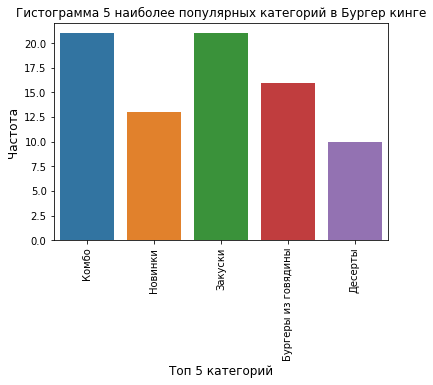

In [15]:
sns.countplot(data[data['Категория'].isin(data['Категория'].value_counts().head().index)]['Категория']);
plt.xlabel('Топ 5 категорий', fontsize=12);
plt.ylabel('Частота', fontsize=12);
plt.xticks(fontsize=10, rotation=90)
plt.title('Гистограмма 5 наиболее популярных категорий в Бургер кинге', fontsize=12);

Удивительный вывод - в Бургер Кинге самая популярная категория это не бургеры, а комбо, и далее закуски. Забавно, что соусов столько же сколько и креветок... Пожалуй, удивило, что видов картошки столько же сколько и видов соуса.... Эта гистограмма принесла неожиданные выводы - не совпадающие с бытовым представлением

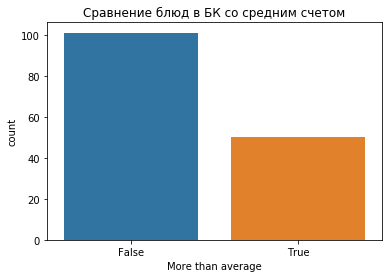

In [16]:
sns.countplot(data['More than average'])
plt.title('Сравнение блюд в БК со средним счетом', fontsize=12);

примерно 25% позиций стоят больше среднего счета за обед - 270руб

## Шаг 5

#### Гипотеза 1: Сырные продукты дороже чем средние

Я люблю сыр и думаю что цены на продукты с сыром дороже чем средние

По факту я проверяю гипотезу вида разницы мат.ожиданий, в нашем случае средних - $H_0: \mu_x - \mu_y = 0$ и альтернативная $H_1: \mu_x - \mu_y != 0$. В данном случае буду использовать подход связных пар.

In [17]:
feat = [f for f in data['Title'] if 'Сыр' in f]
cheeseprices = []
for i in feat:
    try:
        cheeseprices.append(list(data.loc[data['Title'] == i, 'Price'])[0])
    except:
        pass
cheeseprices

[219, 559, 349, 219, 249, 349, 34]

In [18]:
np.mean(cheeseprices) - np.mean(data['Price'])

5.803216650898776

Интересный результат - сырные продукты дороже чем в меню среднем, что и ожидалось

#### Гипотеза 2: Распределение цены имеет хи-квадрат распределение

Здесь поможет тест Колмогорова, который покажет принадлежат ли наши значения распредлению в гипотезе

Я возьму стандартный уровень значимости $\alpha = 0.05$ и например 2 степени свободы 

In [19]:
d = data['Price']
res = stats.kstest(d, lambda x: scipy.stats.chi2.cdf(x, 2), alternative = 'two-sided')
print('--------------')
print(res)
alpha = 0.01
k = ksone.ppf(1 - alpha, n = 4)
if res[0] < k:
    print('H_0 do not reject')
else:
    print('reject')

--------------
KstestResult(statistic=0.9933771775413881, pvalue=0.0)
reject


Отвергаем гипотезу при любом приличном уровне значимости, (см. p-value). Интересный результат - я думал оно все же Хи-квадрат. Конечно, можно поэкспериментировать c loc and scale. но в случае с хи квадратом это не будет так наглядно

#### Гипотеза 3: Дисперсии популярных блюд и бургеров из говядины равны

In [20]:
data.groupby('Категория').get_group('Популярные блюда')

,Title,Price,Категория,More than average,Less than 50?,Popular dish
0,Сырная Мэри,219,Популярные блюда,False,False,True
1,Чикен Кинг,149,Популярные блюда,False,False,True
2,Воппер с сыром,249,Популярные блюда,False,False,True
3,"Кинг Букет ""Крылышки XXL""",599,Популярные блюда,True,False,True
4,Горячий брауни,149,Популярные блюда,False,False,True


In [21]:
data.groupby('Категория').get_group('Бургеры из говядины')

,Title,Price,Категория,More than average,Less than 50?,Popular dish
102,Воппер с сыром,249,Бургеры из говядины,False,False,False
103,Тройной Воппер,369,Бургеры из говядины,True,False,False
104,Двойной Воппер,289,Бургеры из говядины,True,False,False
105,Двойной воппер с сыром,329,Бургеры из говядины,True,False,False
106,Беконайзер,319,Бургеры из говядины,True,False,False
107,Воппер Джуниор,149,Бургеры из говядины,False,False,False
108,Лонг Чизбургер,219,Бургеры из говядины,False,False,False
109,Гамбургер,59,Бургеры из говядины,False,False,False
110,Воппер,199,Бургеры из говядины,False,False,False
111,Стейкхаус,269,Бургеры из говядины,False,False,False


$H_0: \sigma_x^2=\sigma_y^2$ and $H_1: \sigma_x^2 \neq \sigma_y^2$

Для этого использую статистические пакеты и знания из математической статистики

In [22]:
d = list(data.groupby('Категория').get_group('Популярные блюда')['Price'])
l = list(data.groupby('Категория').get_group('Бургеры из говядины')['Price'])
alpha = 0.05

sigmax = statistics.variance(d)
m = len(d)
sigmay = statistics.variance(l)
n = len(l)
z = round(sigmax / sigmay, 4)
point1 = round(f.ppf(alpha / 2, m - 1, n - 1), 4)
point2 = round(f.ppf(1 - alpha / 2, m - 1, n - 1), 4)
point3 = round(f.ppf(alpha, m - 1, n - 1), 4)
pvalue = f.cdf(z, m - 1, n - 1)

print('-----------------------')
display(Math('H_0(region): [{}, {}]'.format(point1, point2)))
display(Math('z = {}'.format(z)))
if z > point1 and z < point2:
    display(Math('H_0 - accept'))
else:
    display(Math('H_0 - reject'))

-----------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Итак, мы отвергаем гипотезу о равенстве дисперсий - они не равны. Из этого можно сделать вывод, что у данных разные дисперсии

#### Гипотеза 4: Вася каждый будний день обедает в бургер кинге. Маме он говорит, что тратит 300 рублей в день на обед. Каждый раз он выбирает рандомно блюдо из категории Комбо. Проверим честность Васи

In [23]:
data.groupby('Категория').get_group('Комбо')

,Title,Price,Категория,More than average,Less than 50?,Popular dish
5,Комбо с Воппером Дж.,189,Комбо,False,False,False
6,Кинг комбо с картофелем,259,Комбо,False,False,False
7,2 Мега-Микса за 599 руб.,599,Комбо,True,False,False
8,Комбо на двоих с Воппером,599,Комбо,True,False,False
9,Комбо на двоих с Чизбургером,399,Комбо,True,False,False
10,Джуниор обед с Чикенбургером,269,Комбо,False,False,False
11,Джуниор обед с Чизбургером,269,Комбо,False,False,False
12,Комбо на двоих с Воппер Роллом,559,Комбо,True,False,False
13,Комбо на двоих с Биг Кингом,459,Комбо,True,False,False
14,Окрыляющее комбо,529,Комбо,True,False,False


In [24]:
vasyacombos = list(data.groupby('Категория').get_group('Комбо')['Price'])
vasyacombos

[189,
 259,
 599,
 599,
 399,
 269,
 269,
 559,
 459,
 529,
 999,
 899,
 1999,
 1299,
 299,
 599,
 599,
 899,
 559,
 899,
 649]

Исключим те, которые стоят больше 1000 рублей

In [25]:
vasyarealcombos = np.array(vasyacombos)[np.array(vasyacombos) < 1000]
vasyarealcombos

array([189, 259, 599, 599, 399, 269, 269, 559, 459, 529, 999, 899, 299,
       599, 599, 899, 559, 899, 649])

In [26]:
vasya_obs = np.random.choice(vasyarealcombos, 5)
vasya_obs

array([559, 269, 599, 599, 399])

Использую критерий Пирсона-Фишера

In [27]:
f_obs = vasya_obs
f_exp = np.repeat(300, 5)
alpha = 0.05

print('-------------------')
print(stats.chisquare(f_obs, f_exp))
print('chi2 point: ', chi2.ppf(1 - alpha, len(f_obs) - 1))
if stats.chisquare(f_obs, f_exp)[0] < chi2.ppf(1 - alpha, len(f_obs) - 1):
    print('H0 accept')
else:
    print('H0 reject')

-------------------
Power_divergenceResult(statistic=855.4833333333332, pvalue=7.351063570187298e-184)
chi2 point:  9.487729036781154
H0 reject


Что же - Вася наврал своей маме и тратит явно больше 300 рублей за 5 будних дней при любом нормальном уровне значимости (см. pvalue)